625*x**4 - 25*x**2 + 1


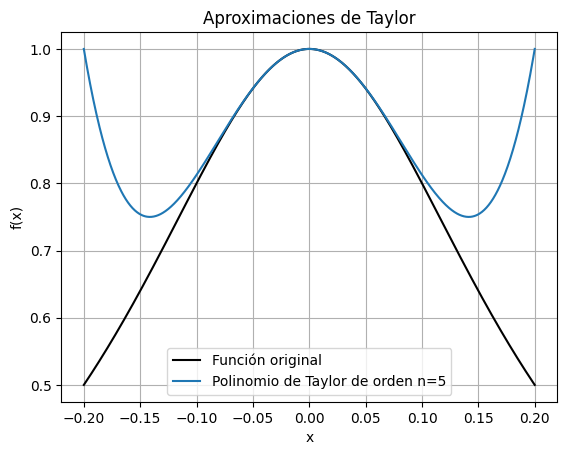

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable
import sympy as sym

def taylor_approx(fcn: Callable[[float], float], x0: float, n: int) -> sym.Symbol:
    x = sym.symbols("x")
    f = sym.sympify(fcn(x))
    taylor: sym.Symbol = 0
    for i in range(n + 1):
        term = f.diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0) ** i
        taylor += term
    return taylor

# Para la gráfica de la función 1)
func = lambda x: 1 / (25 * x * x + 1)
taylor_pol = taylor_approx(func, 0, 5)
print(taylor_pol)

def plot_taylor_approx(fcn: Callable[[float], float], taylor_poly, n: int, x_range: tuple):
    x = sym.symbols("x")
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    original_fcn = sym.lambdify(x, fcn(x), "numpy")
    y_vals = original_fcn(x_vals)

    plt.plot(x_vals, y_vals, label="Función original", color='black')

    taylor_fcn = sym.lambdify(x, taylor_poly, "numpy")
    taylor_y_vals = taylor_fcn(x_vals)

    if np.isscalar(taylor_y_vals):
        taylor_y_vals = np.full_like(x_vals, taylor_y_vals)

    plt.plot(x_vals, taylor_y_vals, label=f"Polinomio de Taylor de orden n={n}")

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Aproximaciones de Taylor")
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamada a la función para graficar
plot_taylor_approx(func, taylor_pol, 5, (-0.2, 0.2))


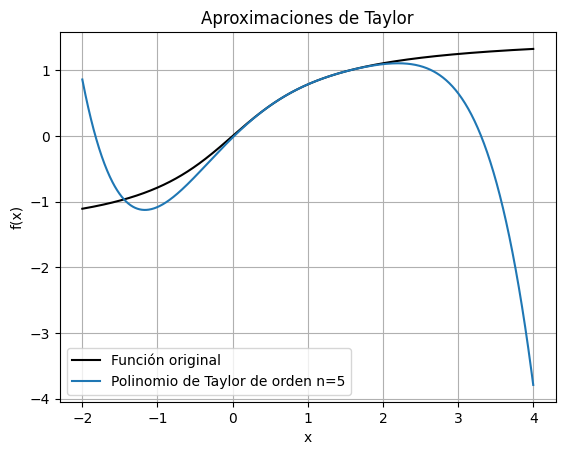

In [ ]:
# Funcion 2
func2 = lambda x : sym.atan(x)
taylor_pol = taylor_approx(func2, 1, 5)
taylor_pol
plot_taylor_approx(func2, taylor_pol, 5, (-2, 4))

    2
-5 x + 1


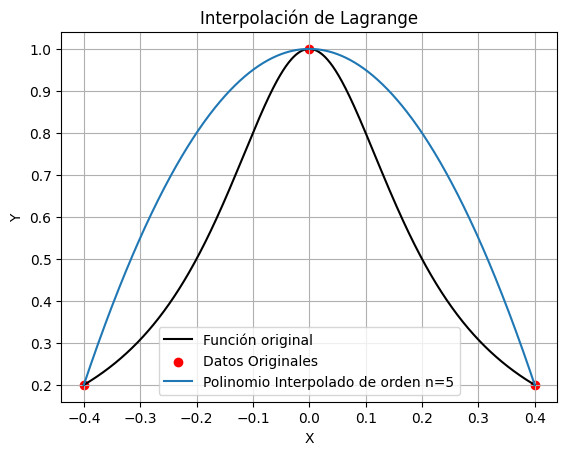

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable
from scipy.interpolate import lagrange
import sympy as sym

# Polinomio de Lagrange para la función 1
X = [-0.4, 0, 0.4]
Y = [0.2, 1, 0.2]
polynomial = lagrange(X, Y)
print(polynomial)

def plot_lagrange(fcn: Callable[[float], float], pol, n: int, x_range: tuple, X, Y):
    x = sym.symbols("x")
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    original_fcn = sym.lambdify(x, fcn(x), "numpy")
    y_vals = original_fcn(x_vals)

    plt.plot(x_vals, y_vals, label="Función original", color='black')

    x_values = np.linspace(x_range[0], x_range[1], 1000)
    y_values = pol(x_values)

    plt.scatter(X, Y, color='red', label='Datos Originales')
    plt.plot(x_values, y_values, label=f'Polinomio Interpolado de orden n={n}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Interpolación de Lagrange')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamada a la función para graficar el polinomio de Lagrange
func = lambda x: 1 / (25 * x * x + 1)
plot_lagrange(func, polynomial, 5, (-0.4, 0.4), X, Y)


         2
-0.2315 x + 1.017 x


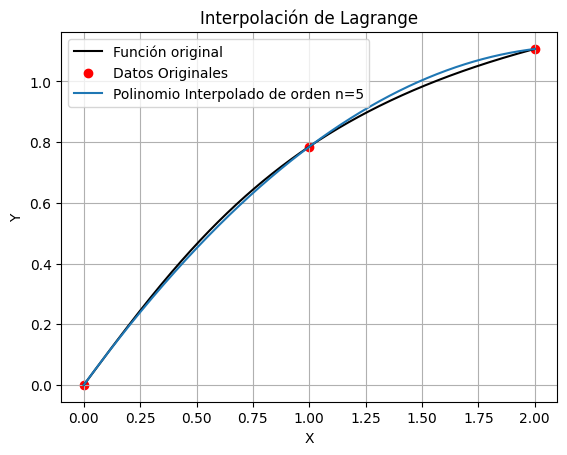

In [ ]:
X = [0, 1, 2]
Y = [0, 0.785, 1.107]
polynomial = lagrange(X, Y)
print(polynomial)
plot_lagrange(func2, polynomial, 5, (0, 2), X, Y)
